In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [29]:
from google.colab import drive
drive.mount('/content/drive')
data_df=pd.read_csv('drive/MyDrive/preprocessingData.csv',header=None)
print(data_df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(4025, 188)


In [30]:
equilibre = data_df[187].value_counts()
print(equilibre)

2    1439
0    1305
1    1281
Name: 187, dtype: int64


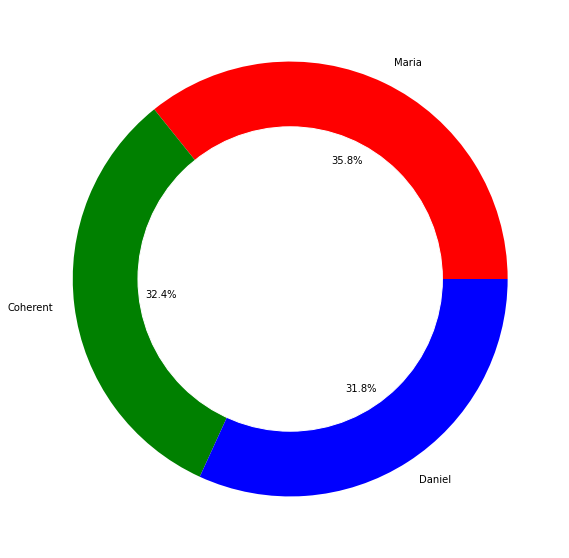

In [31]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['Maria','Coherent','Daniel'], colors=['red','green','blue'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_df.iloc[:, 0:186],data_df.iloc[:, 187], random_state = 50, test_size = 0.3)

#one hot encoding
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

X_train=X_train.iloc[:,:186].values
X_test=X_test.iloc[:,:186].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)
print(X_train.shape)

(2817, 186, 1)


In [33]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(3, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=20,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [34]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [35]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/20
89/89 [==============================] - 5s 40ms/step - loss: 0.2474 - accuracy: 0.9162 - val_loss: 1.2372 - val_accuracy: 0.3402
Epoch 2/20
89/89 [==============================] - 3s 37ms/step - loss: 0.0691 - accuracy: 0.9773 - val_loss: 1.8398 - val_accuracy: 0.3402
Epoch 3/20
89/89 [==============================] - 3s 38ms/step - loss: 0.0223 - accuracy: 0.9947 - val_loss: 2.4025 - val_accuracy: 0.3402
Epoch 4/20
89/89 [==============================] - 3s 38ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 3.0982 - val_accuracy: 0.3402
Epoch 5/20
89/89 [==============================] - 3s 37ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 4.4602 - val_accuracy: 0.3402
Epoch 6/20
89/89 [==============================] - 3s 39ms/step - loss: 0.0460 - accuracy: 0.9879 - val_loss: 4.1261 - val_accuracy: 0.3402
Epoch 7/20
89/89 [==============================] - 3s 39ms/step - loss: 0.0166 - accuracy: 0.9965 - val_loss: 0.2967 - val_accuracy: 0.8866
Epoch 8/20
89

Accuracy: 99.42%


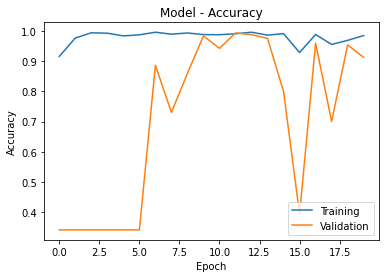

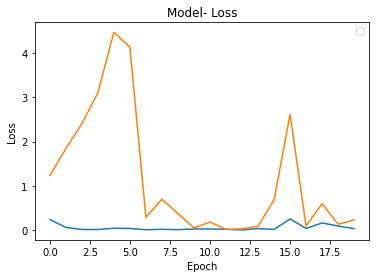

38/38 [==============================] - 0s 10ms/step


In [36]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


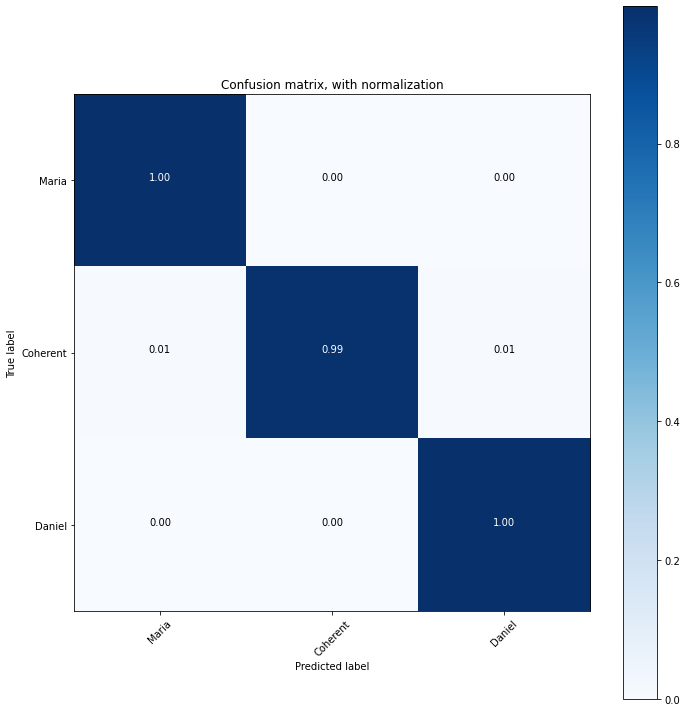

In [37]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['Maria','Coherent','Daniel'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import csv
#read file
demo_data = np.genfromtxt ('drive/MyDrive/ecg_signal.csv', delimiter=',', dtype=np.float64)
demo_data = demo_data.reshape(1, len(demo_data))

In [66]:
filename = "demo.csv"
with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile) 
    for i in range(demo_data.shape[0]):
        current_data = demo_data[i, :demo_data.shape[1] - 1]
        
        label = int(demo_data[i, -1])
        peaks, _ = find_peaks(current_data, height=1.8)

        #find peak by average mid 1/3 difference of the sorted duration
        duration = []
        for j in range(len(peaks) - 1):
            duration.append(peaks[j + 1] - peaks[j])

        sort_duration = np.sort(duration)
        #print(sort_duration)
        period = int(np.mean(sort_duration[len(peaks)//3 : 2 * len(peaks) // 3]))

        #find the offset of the signal
        #find the offset of the signal

        good_peaks = []
        threshold = 10
        for j in range(len(peaks) - 2):
            if np.abs((peaks[j + 1] - peaks[j]) - period) < threshold and np.abs((peaks[j + 2] - peaks[j + 1]) - period) < threshold:
                good_peaks.append(peaks[j + 1])

        ecg = []

        for j in range(len(good_peaks)):
            if good_peaks[j] - period//2 < 0 or good_peaks[j] + period //2 >= demo_data.shape[1]:
                continue

            temp = []
            for k in current_data[good_peaks[j] - period//2: good_peaks[j] + period//2]:
                temp.append(k)
            ecg.append(temp)

        for j in range(len(ecg)):
            len_ecgj = len(ecg[j])
            for k in range(187 - len_ecgj):
                ecg[j] = np.append(ecg[j], [0])
            ecg[j] = np.append(ecg[j], [label])
            csvwriter.writerow(ecg[j])

In [67]:
demo=pd.read_csv('demo.csv',header=None)

for i in range(len(demo)):
  data_test = demo.iloc[i,:186].values
  data_test = data_test.reshape(1, 186, 1)
  ret = model.predict(data_test)
  print(np.argmax(ret))

1/1 [==============================] - 0s 19ms/step
0
1/1 [==============================] - 0s 21ms/step
0
1/1 [==============================] - 0s 20ms/step
0
1/1 [==============================] - 0s 22ms/step
0
1/1 [==============================] - 0s 21ms/step
0
1/1 [==============================] - 0s 20ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 19ms/step
0
1/1 [==============================] - 0s 19ms/step
0
1/1 [==============================] - 0s 18ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 17ms/step
0
1/1 [==============================] - 0s 25ms/step
0
1/1 [==============================] - 0s 19ms/step
0
